In [1]:
import numpy as np

In [2]:
def F(x): # целевая функция
    return sum([ x[i] ** 2 * (1 + np.abs(np.sin(100 * x[i])))  for i in range(x.shape[0]) ])

def Fit(x): 
    return 1 / (1 + F(x))

In [3]:
def cross(x, y): # оператор скрещивания - кроссинговера
    res = []

    p = Fit(x) / (Fit(x) + Fit(y))

    for i in range(x.shape[0]):
        if np.random.random() < p:
            res.append(x[i])
        else:
            res.append(y[i])

    return np.array(res)

In [4]:
def GA_minim(M, K, L, a, b, n):
    pool = []
    res = []
    for _ in range(M): # формируем начальную популяцию - равномерное распределение
        pool.append(np.random.uniform(a, b + 0.1, size=n))
    
    lmb = lambda i : -Fit(i)
    pool.sort(key=lmb)
    res.append([F(pool[0]), Fit(pool[0])])
    print(f'Аргументы - {pool[0]}, значение функции - {res[-1][0]}, итерация - {len(res) - 1}')
    
    for _ in range(L): # на количество итераций
        
        for m in range(M - K, M): # отбраковка худших и замена на новых
            pool[m] = np.random.uniform(a, b + 0.1, size=n)
        
        
        old = pool[:]
        s = sum([ Fit(l) for l in pool])
        p_l = [ Fit(l) / s for l in pool ]
        
        for m in range(1, M):
            eta = np.random.choice(a = len(pool), p = p_l) # рулетка
            pool[m] = cross(pool[m], old[eta])
        
        pool.sort(key=lmb) # сортировка по невозрастанию значений функции Fit
        res.append([F(pool[0]), Fit(pool[0])])
        print(f'Аргументы - {pool[0]}, значение функции - {res[-1][0]}, итерация - {len(res) - 1}')
    
    return res

In [12]:
show = GA_minim(50, 10, 1000, -10, 10, 5)

Аргументы - [ 5.8728599  -1.22858632 -0.39700502  1.01211873  1.45332048], значение функции - 48.699091255628026, итерация - 0
Аргументы - [ 0.78146855  0.88656906 -2.60377529  2.18427309  0.31686623], значение функции - 21.044439975832525, итерация - 1
Аргументы - [ 0.78146855  0.88656906 -2.60377529  2.18427309  0.31686623], значение функции - 21.044439975832525, итерация - 2
Аргументы - [-1.11865567  1.42339257 -0.86574639 -1.59801817 -1.04656342], значение функции - 13.213696921623654, итерация - 3
Аргументы - [ 0.78146855  0.88656906 -0.86574639 -2.03921809  0.31686623], значение функции - 9.06079092997807, итерация - 4
Аргументы - [-1.11865567  0.88656906 -0.86574639  1.01211873  0.31686623], значение функции - 7.002572454171267, итерация - 5
Аргументы - [-1.11865567  0.88656906 -0.86574639  1.01211873  0.31686623], значение функции - 7.002572454171267, итерация - 6
Аргументы - [-1.11865567  0.88656906 -0.86574639  1.01211873  0.31686623], значение функции - 7.002572454171267, ит

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 135
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 136
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 137
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 138
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 139
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 140
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 141
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 200
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 201
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 202
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 203
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 204
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 205
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 206
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 264
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 265
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 266
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 267
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 268
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 269
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 270
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 334
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 335
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 336
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 337
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 338
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 339
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функции - 0.14105465572226672, итерация - 340
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.2285112 ], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 407
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 408
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 409
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 410
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 411
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 412
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 413
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 474
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 475
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 476
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 477
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 478
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 479
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функции - 0.07191849764776737, итерация - 480
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605 -0.11934926], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 544
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 545
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 546
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 547
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 548
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 549
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 550
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 611
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 612
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 613
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 614
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 615
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 616
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 617
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функци

Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 747
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 748
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 749
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 750
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 751
Аргументы - [-0.12341125  0.05490482 -0.04865039 -0.10504605  0.06540094], значение функции - 0.05462981600257121, итерация - 752
Аргументы - [-0.12341125  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.03865790125880928, итерация - 753
Аргументы - [-0.12341125  0.05490482 -0.04865039  0.04923238  0.06540094], значение функци

Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 810
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 811
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 812
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 813
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 814
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 815
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 816
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение

Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 875
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 876
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 877
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 878
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 879
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 880
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 881
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение

Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 940
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 941
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 942
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 943
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 944
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 945
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение функции - 0.026605393915154804, итерация - 946
Аргументы - [-0.06745468  0.05490482 -0.04865039  0.04923238  0.06540094], значение

In [15]:
import matplotlib.pyplot as plt
# import tikzplotlib

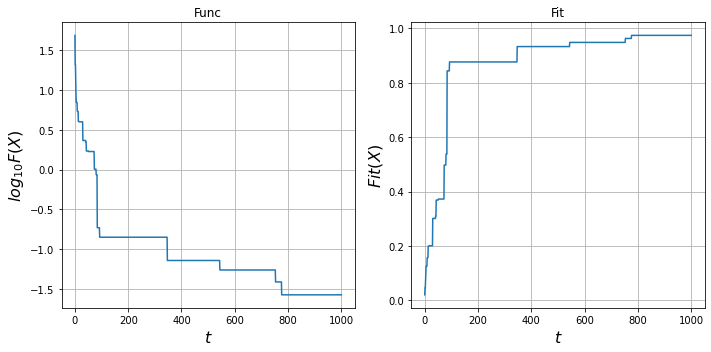

In [16]:
fig, axes = plt.subplots(1, 2, tight_layout = True, figsize=(10, 5))

axes[0].set(title='Func')
axes[1].set(title='Fit')

plt.rcParams['text.usetex'] = True

axes[0].set_ylabel(r'$log_{10}F(X)$', fontsize = 16)
axes[0].set_xlabel(r'$t$', fontsize = 16)
axes[1].set_ylabel(r'$Fit(X)$', fontsize = 16)
axes[1].set_xlabel(r'$t$', fontsize = 16)

axes[0].plot(np.log10(np.array(show)[:, 0]))
axes[1].plot(np.array(show)[:, 1])

axes[0].grid()
axes[1].grid()

plt.rcParams['text.usetex'] = False

plt.show()
# tikzplotlib.save("GA_minim.tex", flavor="context")